In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("6 class csv.csv")
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
df.rename(columns={"Temperature (K)":"Temperature", "Luminosity(L/Lo)":"Luminosity","Radius(R/Ro)":"Radius","Absolute magnitude(Mv)":"Absolute magnitude"})

,Temperature,Luminosity,Radius,Absolute magnitude,Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [ ]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2003c4190>,
      dtype=object)

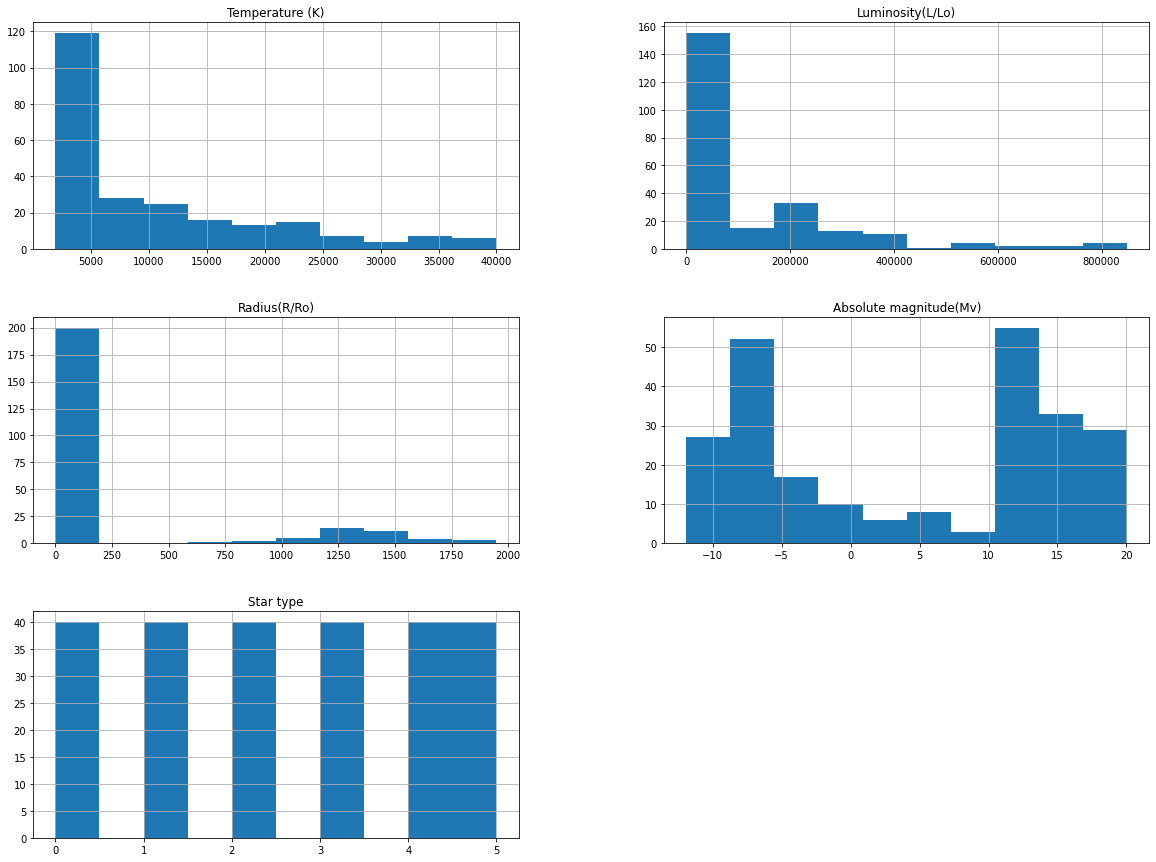

In [ ]:
df.hist(figsize=(20,15))

In [ ]:
print(df.isnull().sum())

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64


In [ ]:
df['Star type'].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star type, dtype: int64

In [ ]:
temp = []
for i in df['Star color']:
  temp.append(i.strip().replace("-"," ").lower())
df['Star color'] = temp

In [ ]:
df['Star color'].value_counts()

red                   112
blue                   56
blue white             41
white                  10
yellow white            8
yellowish white         3
yellowish               3
whitish                 2
orange                  2
white yellow            1
pale yellow orange      1
orange red              1
Name: Star color, dtype: int64

In [ ]:
df['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

In [ ]:
df.replace(['red','blue','blue white','white','yellow white','yellowish white','yellowish','whitish','orange','white yellow','pale yellow orange','orange red'],
            [0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)
df.replace(['M','B','O','A','F','K','G'],[0,1,2,3,4,5,6],inplace=True)

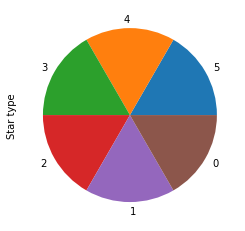

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Star type'].value_counts().plot(kind='pie')

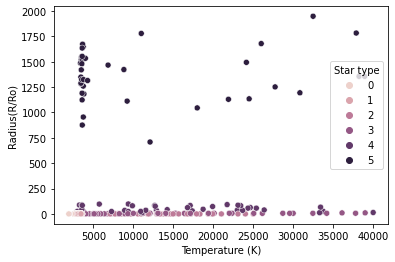

In [ ]:
sns.scatterplot(x=df['Temperature (K)'], y=df['Radius(R/Ro)'],hue=df['Star type'],data=df)

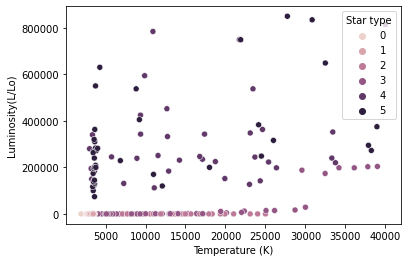

In [ ]:
sns.scatterplot(x=df['Temperature (K)'], y=df['Luminosity(L/Lo)'],hue=df['Star type'],data=df)

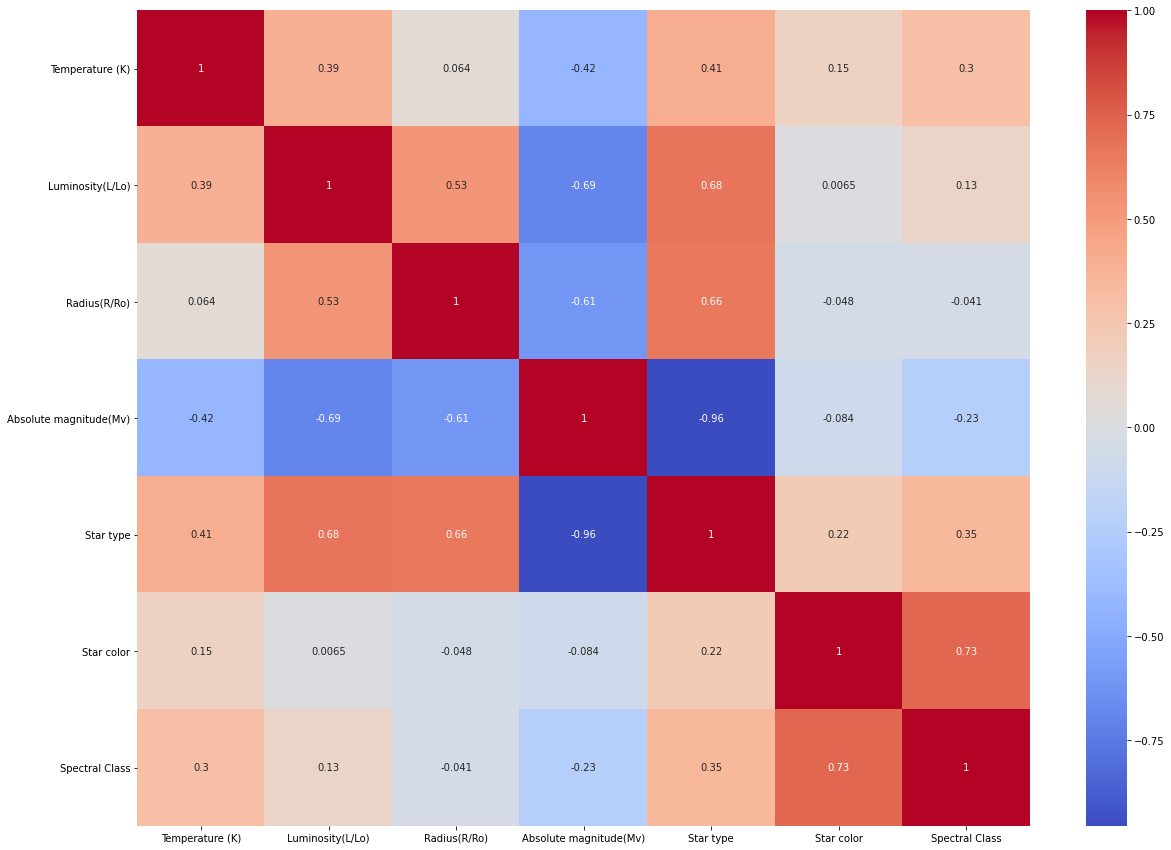

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
X = df.drop(['Star type'],axis=1)
y = df['Star type']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature = X.columns
X[feature] = scaler.fit_transform(X[feature])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.1)

In [ ]:
#Hyper Parameter Tuning
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

#param tuning for knn
param_knn = {'n_neighbors' : np.arange(1,50)}
grid_knn = GridSearchCV(knn, param_grid = param_knn, cv = 5)

#param tuning for dt
param_dt = {'criterion':['gini','entropy'], 'max_depth': np.arange(1,50),'min_samples_leaf':[1,2,3,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid= param_dt, cv = 5)

#param tuning for rf
param_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf': [2,10,30]}
grid_rf = GridSearchCV(rf, param_grid=param_rf, cv = 5)

#param tuning for ada 
param_ada = {'n_estimators':[50,100,250,400,500,600], 'learning_rate':[0.2,0.5,0.8,1]}
grid_ada = GridSearchCV(ada, param_grid=param_ada, cv = 5)

#param tuning for xgb
param_xgb = {'n_estimators':[50,100,250,400,600,800,1000], 'learning_rate':[0.2,0.5,0.8,1]}
rs_xgb = RandomizedSearchCV(xgb, param_distributions = param_xgb, cv= 5)


In [ ]:
grid_knn.fit(X_train,y_train)
grid_dt.fit(X_train,y_train)
grid_rf.fit(X_train,y_train)
grid_ada.fit(X_train,y_train)
rs_xgb.fit(X_train,y_train)

print("Best params for knn : " , grid_knn.best_params_)
print("Best params for dt : " , grid_dt.best_params_)
print("Best params for rf : " , grid_rf.best_params_)
print("Best params for ada : " , grid_ada.best_params_)
print("Best params for xgb : " , rs_xgb.best_params_)

Best params for knn :  {'n_neighbors': 1}
Best params for dt :  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}
Best params for rf :  {'min_samples_leaf': 2, 'n_estimators': 100}
Best params for ada :  {'learning_rate': 0.2, 'n_estimators': 50}
Best params for xgb :  {'n_estimators': 400, 'learning_rate': 0.2}


In [ ]:
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
dt = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_leaf=1)
rf = RandomForestClassifier(min_samples_leaf=2,n_estimators=100,random_state=42)
ada = AdaBoostClassifier(learning_rate=0.2,n_estimators=50)
xgb = XGBClassifier(n_estimators=400,learning_rate=0.2)

bagging = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_leaf=1,random_state=42),n_estimators=100,random_state=42)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
     

In [ ]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Decision Tree', dt), ('Random Forest', rf),('AdaBoost', ada),('Bagging Classifier',bagging),('XGBoost',xgb)]


In [ ]:
from sklearn.metrics import accuracy_score

for classifier_name, classifier in classifiers:

  #fit the model
  classifier.fit(X_train,y_train)

  #test model
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)

  #evaluate the accuracy model
  print('{:s} : {:.2f}'.format(classifier_name,accuracy))

Logistic Regression : 1.00
K Nearest Neighbours : 0.96
Decision Tree : 1.00
Random Forest : 1.00
AdaBoost : 1.00
Bagging Classifier : 1.00
XGBoost : 1.00


In [ ]:
from sklearn.metrics import classification_report

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         3

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



Text(0.5, 15.0, 'Predicted label')

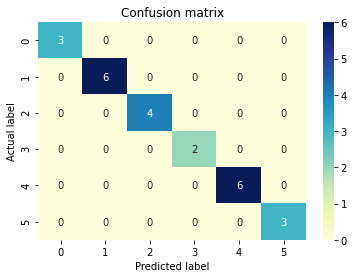

In [ ]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')